<a href="https://colab.research.google.com/github/nurainizafiraaa/Exploring-Clustering-Techniques-with-Python/blob/main/Zafira_Nuraini_Assignment_Day_37_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **Load Data**

In [ ]:
url = 'https://drive.google.com/uc?id=1BC8oxajBeD3GGtlYkUNoc7dHHbOLFbcm'
df = pd.read_csv(url)
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


# **Data Processing**

In [ ]:
df.shape

(62988, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [ ]:
df.columns

Index(['MEMBER_NO', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'FFP_TIER',
       'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'LOAD_TIME',
       'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM',
       'LAST_FLIGHT_DATE', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
       'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight'],
      dtype='object')

In [ ]:
df.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


## **Mengubah Data Type dan Feature Selection**

Kolom Credit lebih baik dijumlahkan menjadi 1

In [ ]:
df['SUM_CREDIT'] = df['SUM_YR_1'] + df['SUM_YR_2']

Beberapa variabel di bawah perlu di drop agar tidak menjadi noice dalam proses clustering, melihat variabel" di atas tidak berhubungan dengan pengukuran loyalitas.

In [ ]:
drop_cols = ['FFP_TIER', 'FFP_DATE', 'GENDER', 'LOAD_TIME', 'SUM_YR_1', 'SUM_YR_2', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY']
df = df.drop(columns=drop_cols)

In [ ]:
date_cols = ['FIRST_FLIGHT_DATE', 'LAST_FLIGHT_DATE']

for c in date_cols:
    df[c] = pd.to_datetime(df[c], errors='coerce')

In [ ]:
df['LAST_TO_END'] = df['LAST_TO_END'].astype('int64')

In [ ]:
df.head()

,MEMBER_NO,FIRST_FLIGHT_DATE,AGE,FLIGHT_COUNT,BP_SUM,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,SUM_CREDIT
0,54993,2008-12-24,31.0,210,505308,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50,473748.0
1,28065,2007-08-03,42.0,140,362480,293678,2014-03-25,7,5.194245,17,29,1.252314,415768,33,338917.0
2,55106,2007-08-30,40.0,135,351159,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26,328600.0
3,21189,2008-08-23,64.0,23,337314,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12,241850.0
4,39546,2009-04-15,48.0,152,273844,309928,2014-03-27,5,4.788079,47,27,0.970658,338813,39,255262.0


## **Data Cleaning**

In [ ]:
# Deteksi Data Duplikat

len(df.drop_duplicates()) / len(df)
#jika output dari code di cell ini tidak bernilai 1 maka terdapat duplikat

1.0

In [ ]:
# Menghapus DUplikat

df = df.drop_duplicates()

In [ ]:
len(df.drop_duplicates()) / len(df)

1.0

In [ ]:
# Deteksi Missing Value

# percentage version
total_rows = len(df)

# Menghitung dan menampilkan persentase missing values di setiap kolom satu per satu
for column in df.columns:
    missing_count = df[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)") # .2f means 2 decimal

Column 'MEMBER_NO' Has 0 missing values (0.00%)
Column 'FIRST_FLIGHT_DATE' Has 0 missing values (0.00%)
Column 'AGE' Has 420 missing values (0.67%)
Column 'FLIGHT_COUNT' Has 0 missing values (0.00%)
Column 'BP_SUM' Has 0 missing values (0.00%)
Column 'SEG_KM_SUM' Has 0 missing values (0.00%)
Column 'LAST_FLIGHT_DATE' Has 421 missing values (0.67%)
Column 'LAST_TO_END' Has 0 missing values (0.00%)
Column 'AVG_INTERVAL' Has 0 missing values (0.00%)
Column 'MAX_INTERVAL' Has 0 missing values (0.00%)
Column 'EXCHANGE_COUNT' Has 0 missing values (0.00%)
Column 'avg_discount' Has 0 missing values (0.00%)
Column 'Points_Sum' Has 0 missing values (0.00%)
Column 'Point_NotFlight' Has 0 missing values (0.00%)
Column 'SUM_CREDIT' Has 689 missing values (1.09%)


In [ ]:
df.isna().sum()

,0
MEMBER_NO,0
FIRST_FLIGHT_DATE,0
AGE,420
FLIGHT_COUNT,0
BP_SUM,0
SEG_KM_SUM,0
LAST_FLIGHT_DATE,421
LAST_TO_END,0
AVG_INTERVAL,0
MAX_INTERVAL,0


In [ ]:
df.isnull().sum()

,0
MEMBER_NO,0
FIRST_FLIGHT_DATE,0
AGE,420
FLIGHT_COUNT,0
BP_SUM,0
SEG_KM_SUM,0
LAST_FLIGHT_DATE,421
LAST_TO_END,0
AVG_INTERVAL,0
MAX_INTERVAL,0


### **Handle Missing Value**

In [ ]:
# Kolom numerik dengan median
df["AGE"] = df["AGE"].fillna(df["AGE"].median())

# Last Flight diisi dengan tanggal terakhir (maksimum)
df["LAST_FLIGHT_DATE"] = df["LAST_FLIGHT_DATE"].fillna(df["LAST_FLIGHT_DATE"].max())

In [ ]:
# Deteksi Missing Value

# percentage version
total_rows = len(df)

# Menghitung dan menampilkan persentase missing values di setiap kolom satu per satu
for column in df.columns:
    missing_count = df[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)") # .2f means 2 decimal

Column 'MEMBER_NO' Has 0 missing values (0.00%)
Column 'FIRST_FLIGHT_DATE' Has 0 missing values (0.00%)
Column 'AGE' Has 0 missing values (0.00%)
Column 'FLIGHT_COUNT' Has 0 missing values (0.00%)
Column 'BP_SUM' Has 0 missing values (0.00%)
Column 'SEG_KM_SUM' Has 0 missing values (0.00%)
Column 'LAST_FLIGHT_DATE' Has 0 missing values (0.00%)
Column 'LAST_TO_END' Has 0 missing values (0.00%)
Column 'AVG_INTERVAL' Has 0 missing values (0.00%)
Column 'MAX_INTERVAL' Has 0 missing values (0.00%)
Column 'EXCHANGE_COUNT' Has 0 missing values (0.00%)
Column 'avg_discount' Has 0 missing values (0.00%)
Column 'Points_Sum' Has 0 missing values (0.00%)
Column 'Point_NotFlight' Has 0 missing values (0.00%)
Column 'SUM_CREDIT' Has 689 missing values (1.09%)


# **EDA**

In [ ]:
numerik = ['AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SEG_KM_SUM', 'AVG_INTERVAL', 'MAX_INTERVAL', 'LAST_TO_END',
           'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight', 'SUM_CREDIT']

In [ ]:
# Cek Multicoloniarity antar variabel numerik

df_corr = df[numerik].corr()
df_corr

,AGE,FLIGHT_COUNT,BP_SUM,SEG_KM_SUM,AVG_INTERVAL,MAX_INTERVAL,LAST_TO_END,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,SUM_CREDIT
AGE,1.000000,0.073346,0.100311,0.087215,-0.024549,0.009412,-0.025641,0.029754,0.132520,0.074719,-0.091930,0.106118
FLIGHT_COUNT,0.073346,1.000000,0.788379,0.850411,-0.316833,-0.188682,-0.404999,0.502501,0.139377,0.747092,0.291880,0.846304
BP_SUM,0.100311,0.788379,1.000000,0.921724,-0.246764,-0.147953,-0.319039,0.530021,0.307245,0.923271,0.244254,0.951825
SEG_KM_SUM,0.087215,0.850411,0.921724,1.000000,-0.280746,-0.155508,-0.369509,0.507819,0.108393,0.853014,0.259037,0.906959
AVG_INTERVAL,-0.024549,-0.316833,-0.246764,-0.280746,1.000000,0.724392,-0.108594,-0.130226,-0.038814,-0.220946,-0.075967,-0.271238
MAX_INTERVAL,0.009412,-0.188682,-0.147953,-0.155508,0.724392,1.000000,-0.343939,-0.089417,-0.016392,-0.135977,-0.042843,-0.169622
LAST_TO_END,-0.025641,-0.404999,-0.319039,-0.369509,-0.108594,-0.343939,1.000000,-0.169717,-0.021036,-0.292027,-0.124074,-0.337348
EXCHANGE_COUNT,0.029754,0.502501,0.530021,0.507819,-0.130226,-0.089417,-0.169717,1.000000,0.112589,0.578581,0.396115,0.523796
avg_discount,0.132520,0.139377,0.307245,0.108393,-0.038814,-0.016392,-0.021036,0.112589,1.000000,0.263882,-0.010315,0.276135
Points_Sum,0.074719,0.747092,0.923271,0.853014,-0.220946,-0.135977,-0.292027,0.578581,0.263882,1.000000,0.406905,0.885963


<Axes: >

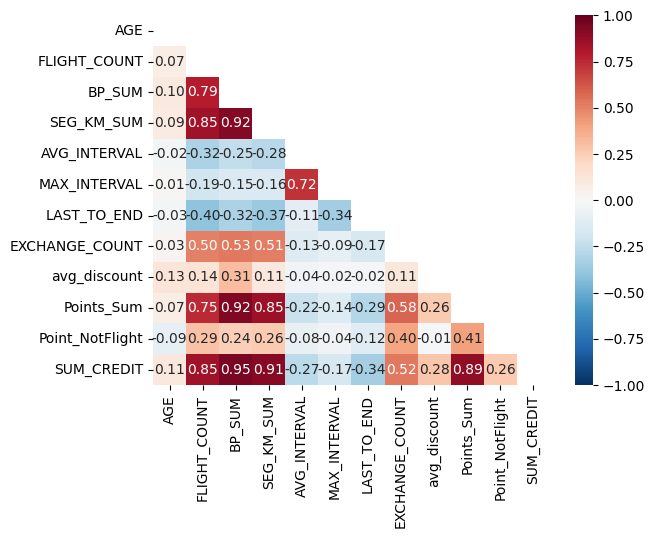

In [ ]:
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(
  df_corr,
  vmin=-1,
  vmax=1,
  annot=True,
  fmt='.2f',
  mask=mask,
  cmap='RdBu_r',
)

In [ ]:
drop_numericals = ['BP_SUM', 'MAX_INTERVAL', 'SEG_KM_SUM', 'Points_Sum', 'SUM_CREDIT']

new_numerik = ['AGE', 'FLIGHT_COUNT', 'AVG_INTERVAL', 'LAST_TO_END', 'EXCHANGE_COUNT', 'avg_discount', 'Point_NotFlight']

df = df.drop(columns=drop_numericals)

df.head()

,MEMBER_NO,FIRST_FLIGHT_DATE,AGE,FLIGHT_COUNT,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,EXCHANGE_COUNT,avg_discount,Point_NotFlight
0,54993,2008-12-24,31.0,210,2014-03-31,1,3.483254,34,0.961639,50
1,28065,2007-08-03,42.0,140,2014-03-25,7,5.194245,29,1.252314,33
2,55106,2007-08-30,40.0,135,2014-03-21,11,5.298507,20,1.254676,26
3,21189,2008-08-23,64.0,23,2013-12-26,97,27.863636,11,1.090870,12
4,39546,2009-04-15,48.0,152,2014-03-27,5,4.788079,27,0.970658,39


Terlihat bahwa beberapa variabel perlu di drop karena punya multicoloniarity yang tinggi:

* Mempertahankan AVG Interval dan drop MAX Interval
* Mempertahankan Flight Count dan SUM_CREDIT, lalu drop BP_SUM, SEG_KM_SUM,  POINT_SUM

saya memilih tetap mempertahankan flight count dan sum credit karena keduanya akan digunakan pada RFM. Namun untuk di K-Means kita akan pilih

In [ ]:
import scipy.stats as stats

def check_plot(df_km, variable):

    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

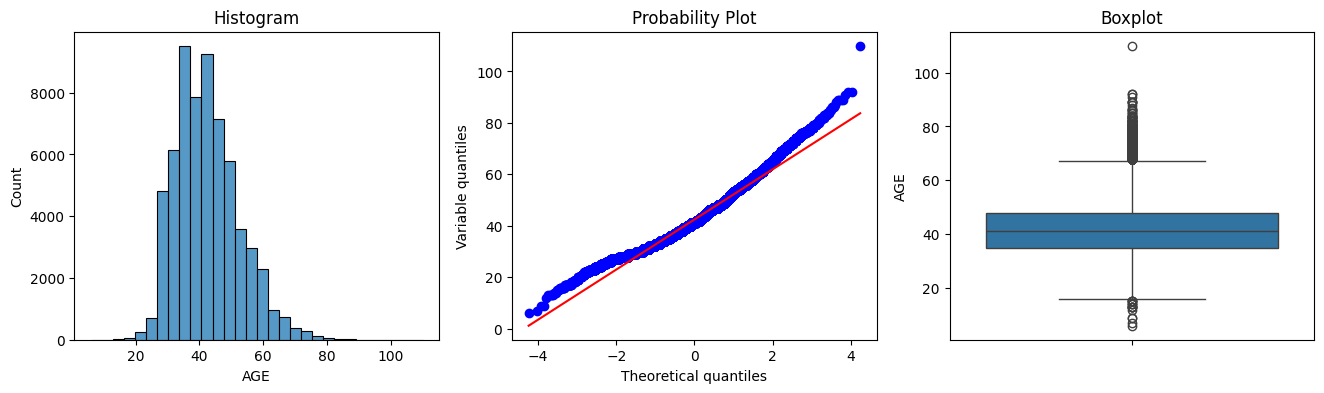

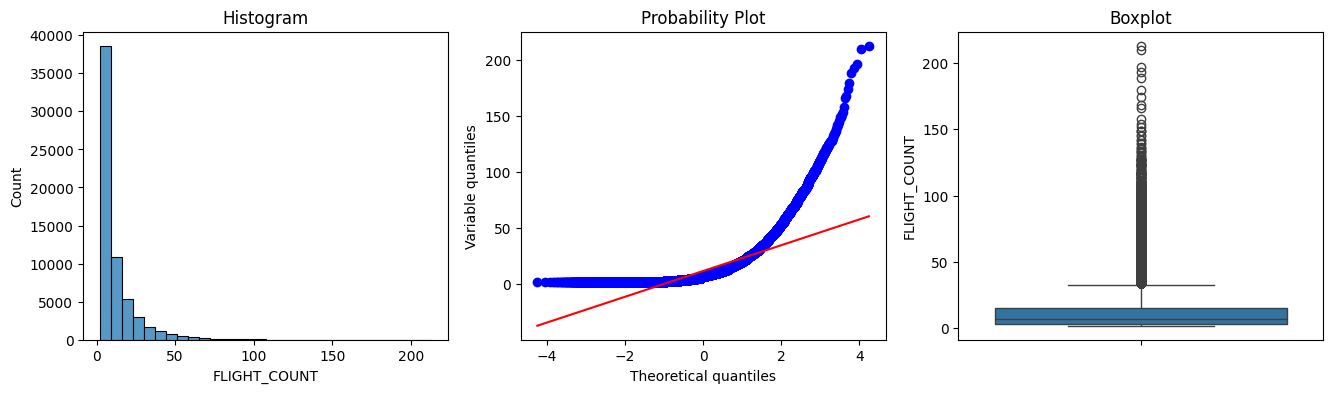

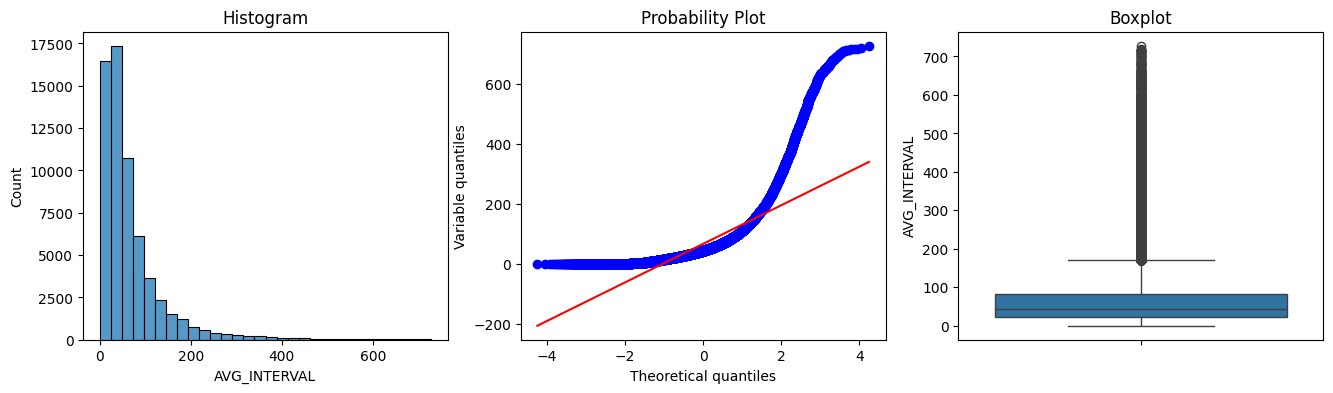

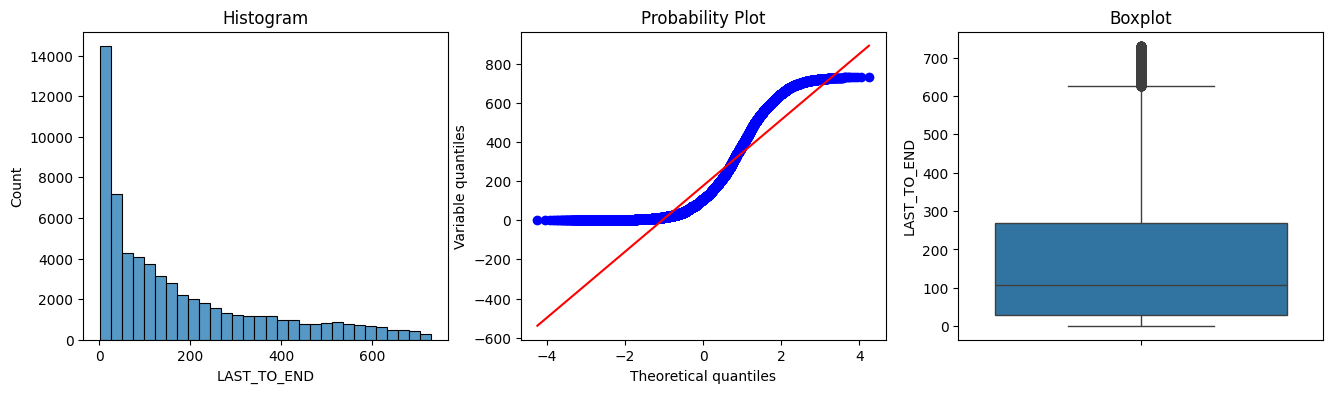

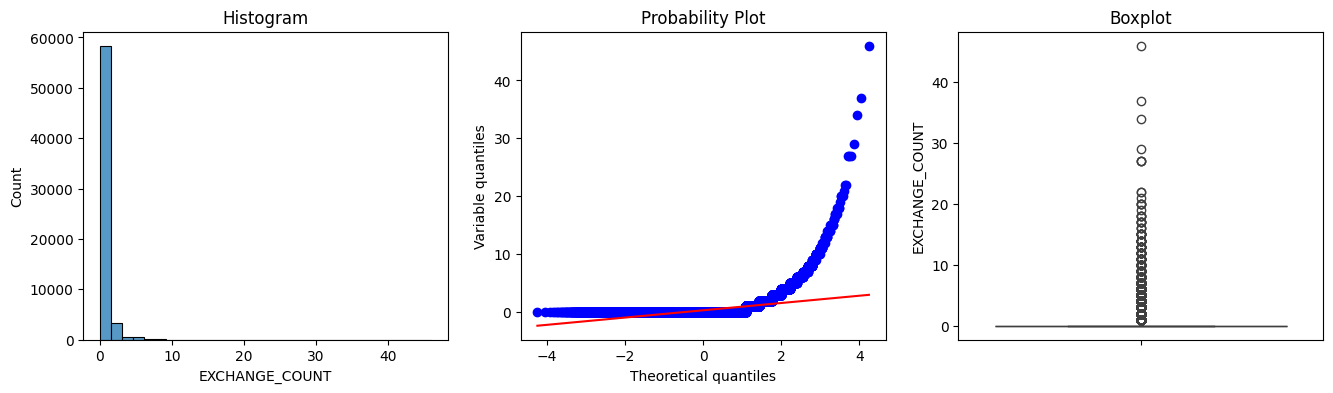

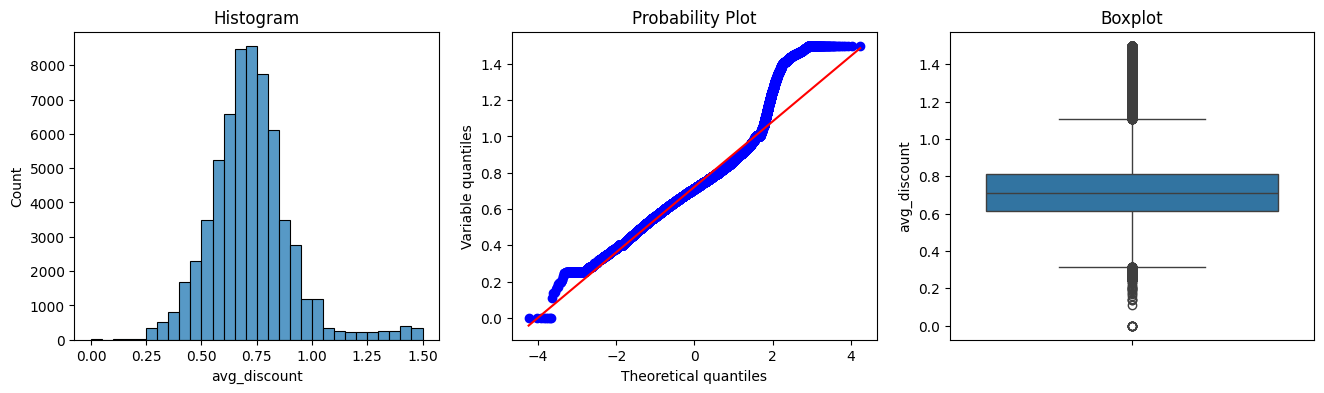

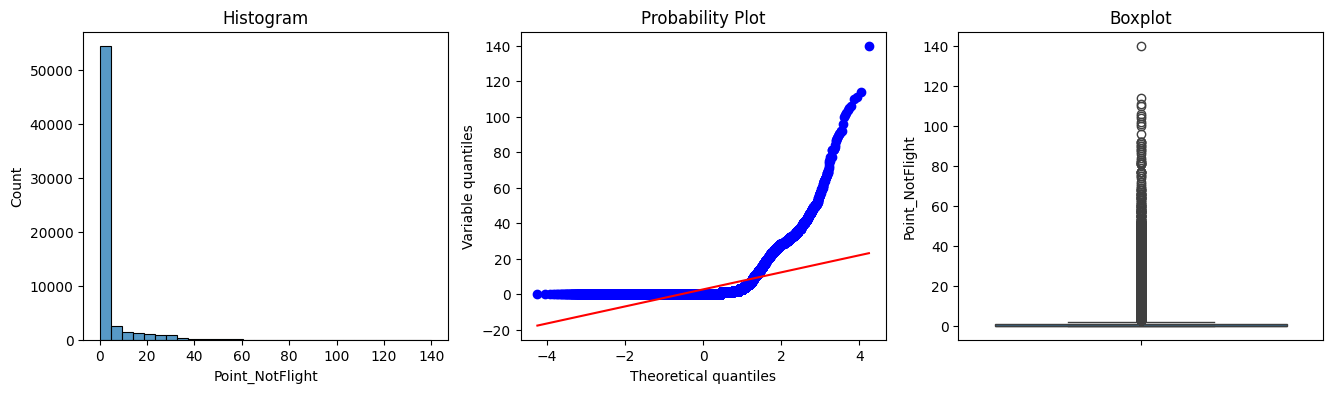

In [ ]:
# Distribusi Kolom Numerik

for col in new_numerik:
    check_plot(df, col)

In [ ]:
df[new_numerik].describe()

,AGE,FLIGHT_COUNT,AVG_INTERVAL,LAST_TO_END,EXCHANGE_COUNT,avg_discount,Point_NotFlight
count,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000
mean,42.466502,11.839414,67.749788,176.120102,0.319775,0.721558,2.728155
std,9.853632,14.049471,77.517866,183.822223,1.136004,0.185427,7.364164
min,6.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,35.000000,3.000000,23.370370,29.000000,0.000000,0.611997,0.000000
50%,41.000000,7.000000,44.666667,108.000000,0.000000,0.711856,0.000000
75%,48.000000,15.000000,82.000000,268.000000,0.000000,0.809476,1.000000
max,110.000000,213.000000,728.000000,731.000000,46.000000,1.500000,140.000000


**Scaling**

In [ ]:
# Standarisasi
df_km = df[new_numerik].copy()

scaler = StandardScaler()

df_km[new_numerik] = scaler.fit_transform(df_km[new_numerik])

In [ ]:
df_km.describe()

,AGE,FLIGHT_COUNT,AVG_INTERVAL,LAST_TO_END,EXCHANGE_COUNT,avg_discount,Point_NotFlight
count,6.298800e+04,6.298800e+04,6.298800e+04,6.298800e+04,6.298800e+04,6.298800e+04,6.298800e+04
mean,2.472709e-16,-1.010742e-16,-1.877093e-16,2.887835e-17,-3.609794e-18,-1.010742e-16,5.865915e-17
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-3.700848e+00,-7.003461e-01,-8.739963e-01,-9.526677e-01,-2.814934e-01,-3.891369e+00,-3.704665e-01
25%,-7.577470e-01,-6.291685e-01,-5.725102e-01,-8.003454e-01,-2.814934e-01,-5.908618e-01,-3.704665e-01
50%,-1.488297e-01,-3.444580e-01,-2.977804e-01,-3.705789e-01,-2.814934e-01,-5.231986e-02,-3.704665e-01
75%,5.615739e-01,2.249630e-01,1.838328e-01,4.998342e-01,-2.814934e-01,4.741442e-01,-2.346727e-01
max,6.853720e+00,1.431813e+01,8.517462e+00,3.018592e+00,4.021163e+01,4.198148e+00,1.864067e+01


# **Clustering dengan K-Means**

In [ ]:
df_km.head()

,AGE,FLIGHT_COUNT,AVG_INTERVAL,LAST_TO_END,EXCHANGE_COUNT,avg_discount,Point_NotFlight
0,-1.163692,14.104600,-0.829061,-0.952668,29.648208,1.294761,6.419225
1,-0.047343,9.122166,-0.806989,-0.920027,25.246781,2.862377,4.110730
2,-0.250316,8.766278,-0.805644,-0.898267,17.324213,2.875110,3.160173
3,2.185353,0.794384,-0.514545,-0.430420,9.401645,1.991703,1.259059
4,0.561574,9.976297,-0.812228,-0.930907,23.486211,1.343400,4.925493


**Elbow Method**

In [ ]:
from sklearn.cluster import KMeans
list_inertia = []

for i in range(2, 11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(df_km)
  nilai_inertia = kmeans.inertia_
  list_inertia.append(nilai_inertia)
  print(f'cluster ke {i} dengan nilai inertia {round(nilai_inertia, 2)}')

cluster ke 2 dengan nilai inertia 397934.14
cluster ke 3 dengan nilai inertia 317281.08
cluster ke 4 dengan nilai inertia 285952.89
cluster ke 5 dengan nilai inertia 250656.66
cluster ke 6 dengan nilai inertia 223396.21
cluster ke 7 dengan nilai inertia 204563.51
cluster ke 8 dengan nilai inertia 188398.02
cluster ke 9 dengan nilai inertia 179952.53
cluster ke 10 dengan nilai inertia 172008.39


Text(0.5, 1.0, 'Elbow method')

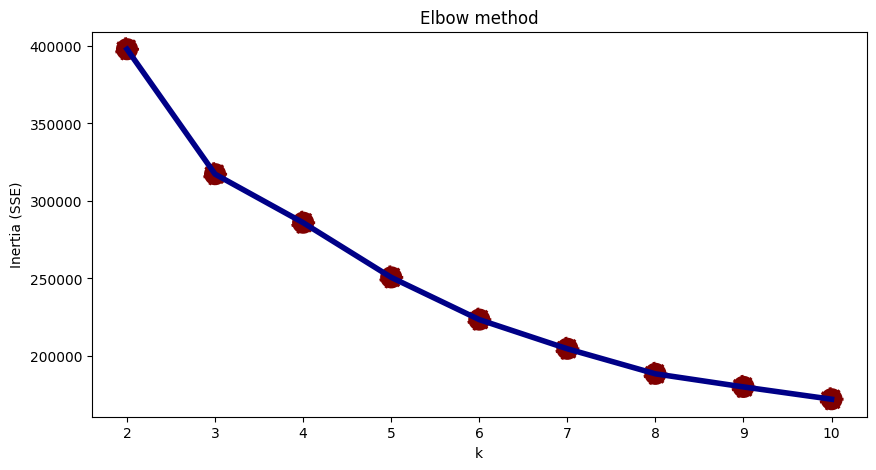

In [ ]:
plt.figure(figsize=(10, 5))

sns.lineplot(x=range(2, 11), y=list_inertia, color='#000087', linewidth=4)
sns.scatterplot(x=range(2, 11), y=list_inertia, s=300, color='#800000', linestyle='--')

plt.xlabel('k')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow method')

**Silhouette Score**

In [ ]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
# Basically score from -1 sampai 1
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
   kmeans = KMeans(n_clusters=i, random_state=42).fit(df_km)
   preds = kmeans.predict(df_km)

   score_euclidean = silhouette_score(df_km, preds, metric='euclidean')
   arr_silhouette_score_euclidean.append(score_euclidean)

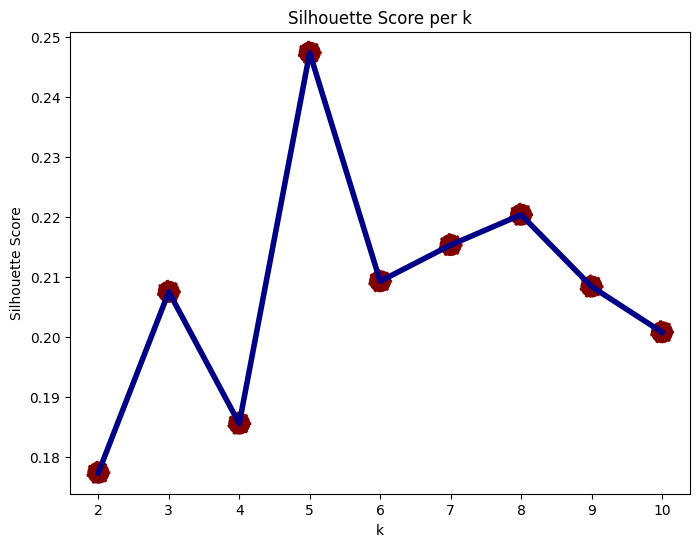

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth=4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000', linestyle='--')

plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score per k')
plt.show()

In [ ]:
# Hitung Silhouette Score

range_n_clusters = list(range(2, 11))
arr_silhouette_score = []

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(df_km)
    score = silhouette_score(df_km, preds, metric='euclidean')
    arr_silhouette_score.append(score)
    print(f"k={k}, Silhouette Score={score:.4f}")

k=2, Silhouette Score=0.1773
k=3, Silhouette Score=0.2075
k=4, Silhouette Score=0.1855
k=5, Silhouette Score=0.2474
k=6, Silhouette Score=0.2093
k=7, Silhouette Score=0.2153
k=8, Silhouette Score=0.2204
k=9, Silhouette Score=0.2084
k=10, Silhouette Score=0.2008


**Observasi:**

* Dari hasil Elbow, k yang tepat berada di antara 4 dan 5, dimana K=5 memiliki score tertinggi dan titik mulai landai
* Dari hasil Silhoutte terlihat k=5 memiliki score tertinggi

Sehingga k ada diantara 4 dan 5 yang akan digunakan untuk iterasi

In [ ]:
# K=5

k5 = 5
kmeans5 = KMeans(n_clusters=k5, random_state=42)
df_km[f'cluster_k{k5}'] = kmeans5.fit_predict(df_km)

df_km.head()

,AGE,FLIGHT_COUNT,AVG_INTERVAL,LAST_TO_END,EXCHANGE_COUNT,avg_discount,Point_NotFlight,cluster_k5
0,-1.163692,14.104600,-0.829061,-0.952668,29.648208,1.294761,6.419225,2
1,-0.047343,9.122166,-0.806989,-0.920027,25.246781,2.862377,4.110730,2
2,-0.250316,8.766278,-0.805644,-0.898267,17.324213,2.875110,3.160173,2
3,2.185353,0.794384,-0.514545,-0.430420,9.401645,1.991703,1.259059,2
4,0.561574,9.976297,-0.812228,-0.930907,23.486211,1.343400,4.925493,2


In [ ]:
# K=4

k4 = 4
kmeans4 = KMeans(n_clusters=k4, random_state=42)
df_km[f'cluster_k{k4}'] = kmeans4.fit_predict(df_km)

df_km.head()

,AGE,FLIGHT_COUNT,AVG_INTERVAL,LAST_TO_END,EXCHANGE_COUNT,avg_discount,Point_NotFlight,cluster_k5,cluster_k4
0,-1.163692,14.104600,-0.829061,-0.952668,29.648208,1.294761,6.419225,2,2
1,-0.047343,9.122166,-0.806989,-0.920027,25.246781,2.862377,4.110730,2,2
2,-0.250316,8.766278,-0.805644,-0.898267,17.324213,2.875110,3.160173,2,2
3,2.185353,0.794384,-0.514545,-0.430420,9.401645,1.991703,1.259059,2,2
4,0.561574,9.976297,-0.812228,-0.930907,23.486211,1.343400,4.925493,2,2


**Cluster Profile**

In [ ]:
df_k5 = df[new_numerik].copy()

df_k5['cluster'] = df_km[f'cluster_k{k5}']

cluster_profile = df_k5.groupby('cluster').mean().round(2)
display(cluster_profile)

,AGE,FLIGHT_COUNT,AVG_INTERVAL,LAST_TO_END,EXCHANGE_COUNT,avg_discount,Point_NotFlight
cluster,,,,,,,
0,43.32,12.85,54.39,84.20,0.16,0.73,0.83
1,41.55,4.17,40.85,457.10,0.04,0.71,0.57
2,44.23,51.63,17.42,30.70,3.80,0.83,11.03
3,41.16,2.84,261.85,144.94,0.03,0.70,0.87
4,38.43,13.44,55.85,128.60,0.54,0.67,24.86


# **Visualisasi K-Means**

### Visualisasi Clustering (AGE vs FLIGHT_COUNT)

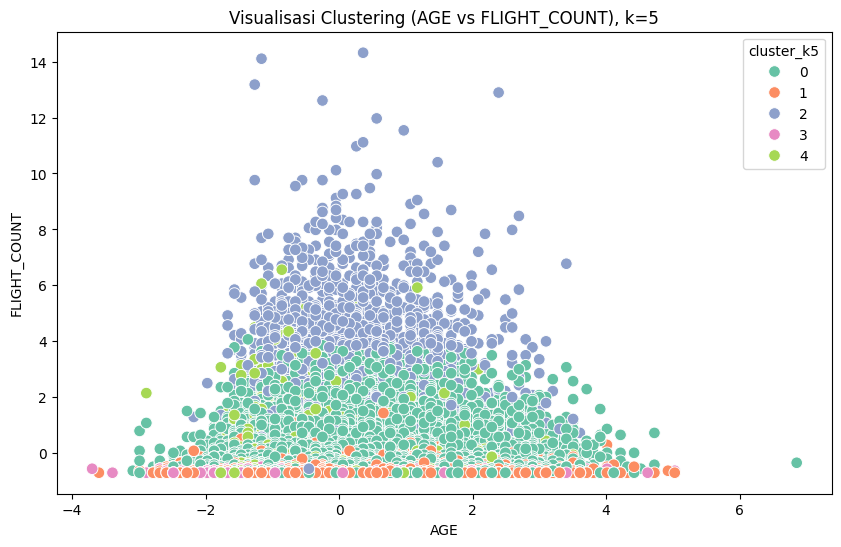

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_km,
    x='AGE',
    y='FLIGHT_COUNT',
    hue=f'cluster_k{5}',
    palette='Set2',
    s=70
)
plt.title(f'Visualisasi Clustering (AGE vs FLIGHT_COUNT), k={5}')
plt.show()

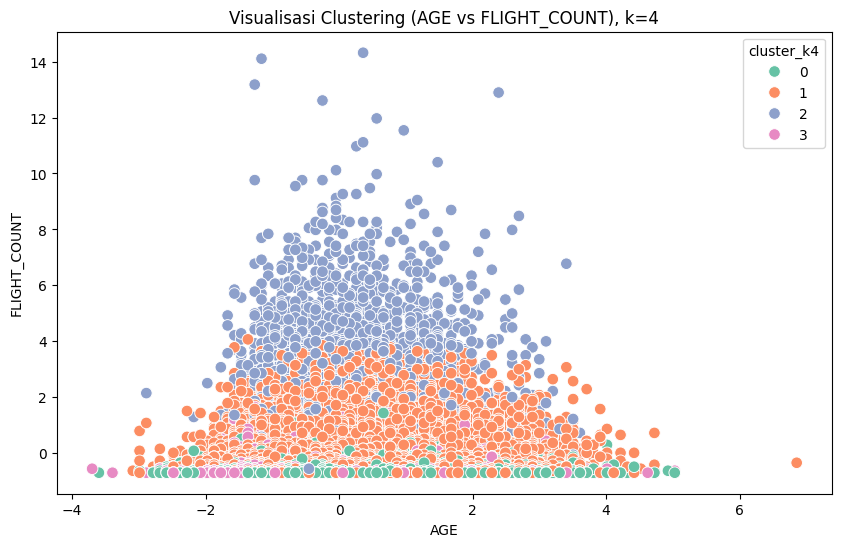

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_km,
    x='AGE',
    y='FLIGHT_COUNT',
    hue=f'cluster_k{4}',
    palette='Set2',
    s=70
)
plt.title(f'Visualisasi Clustering (AGE vs FLIGHT_COUNT), k={4}')
plt.show()


**Overview:**
* Pada kedua plot, ada klaster besar yang mendominasi di bagian tengah, mencakup rentang usia dan jumlah penerbangan yang paling umum. Klaster ini bisa diinterpretasikan sebagai "pelanggan rata-rata".

* Kedua plot menunjukkan cluster 2 mendominais bagian atas flight count secara umum.



### Visualisasi Clustering (FLIGHT_COUNT vs AVG_INTERVAL)

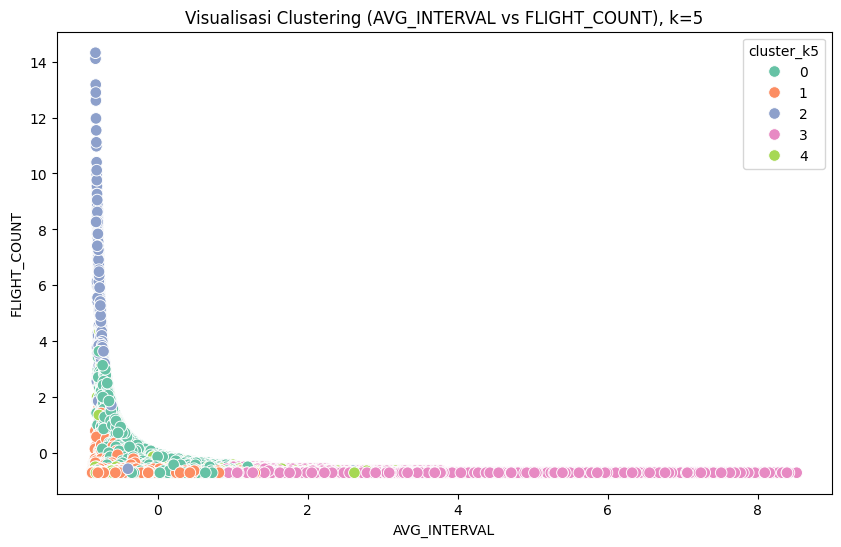

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_km,
    x='AVG_INTERVAL',
    y='FLIGHT_COUNT',
    hue=f'cluster_k{5}',
    palette='Set2',
    s=70
)
plt.title(f'Visualisasi Clustering (AVG_INTERVAL vs FLIGHT_COUNT), k={5}')
plt.show()

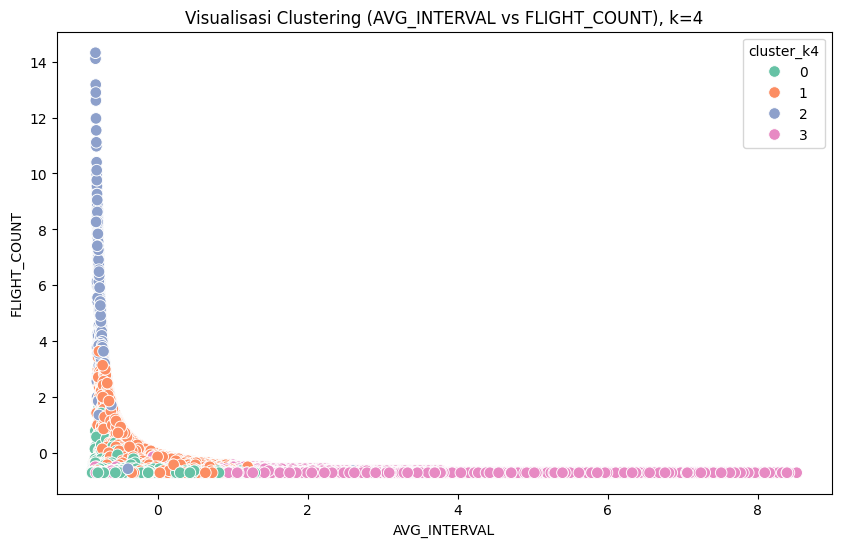

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_km,
    x='AVG_INTERVAL',
    y='FLIGHT_COUNT',
    hue=f'cluster_k{4}',
    palette='Set2',
    s=70
)
plt.title(f'Visualisasi Clustering (AVG_INTERVAL vs FLIGHT_COUNT), k={4}')
plt.show()

**Overview:**
* Perbedaan kedua plot terletak pada bagian flight count rendah dna avg_interval rendah yang mana dengan k=5 terbagi menjadi 2 cluster (1 dan 0).

* Kedua plot menunjukkan cluster 2 mendominasi bagian atas flight count secara umum dan avg_interval rendah, serta cluster 3 mendominasi flight count rendah dengan avg_interval tinggi.


### Visualisasi Clustering (EXCHANGE_COUNT vs avg_discount)

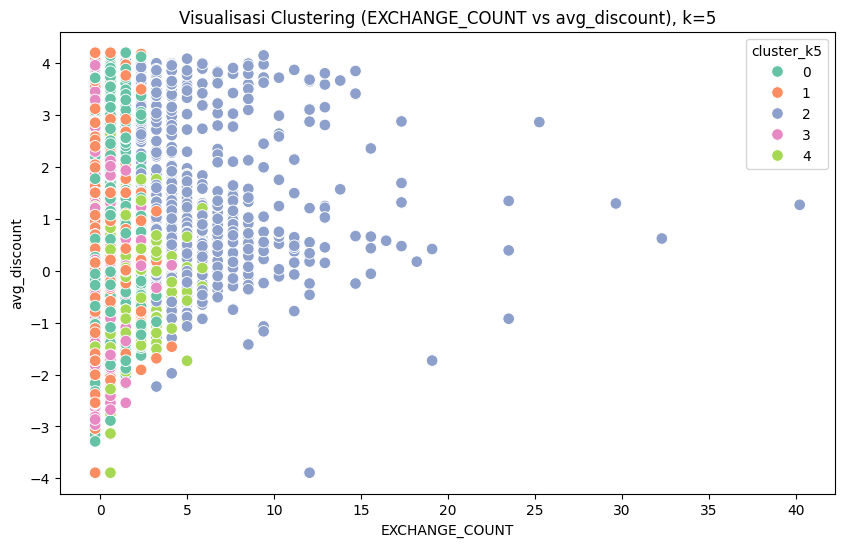

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_km,
    x='EXCHANGE_COUNT',
    y='avg_discount',
    hue=f'cluster_k{5}',
    palette='Set2',
    s=70
)
plt.title(f'Visualisasi Clustering (EXCHANGE_COUNT vs avg_discount), k={5}')
plt.show()

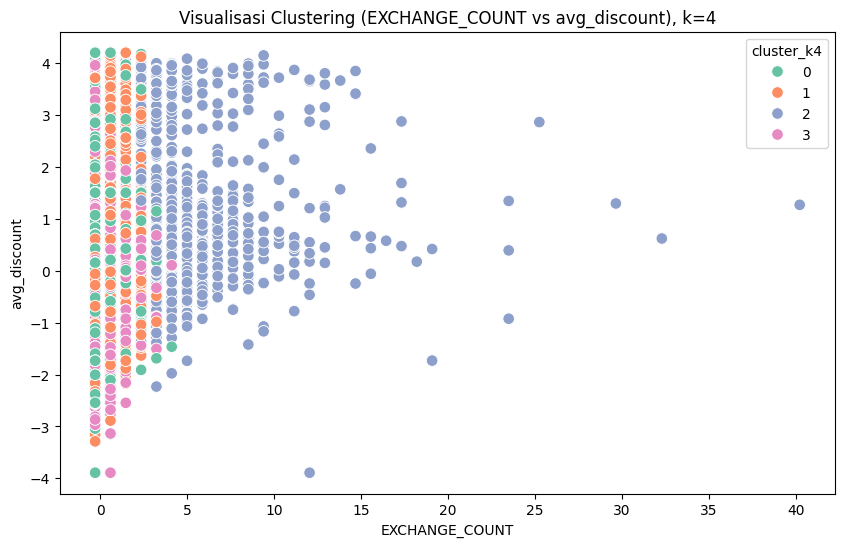

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_km,
    x='EXCHANGE_COUNT',
    y='avg_discount',
    hue=f'cluster_k{4}',
    palette='Set2',
    s=70
)
plt.title(f'Visualisasi Clustering (EXCHANGE_COUNT vs avg_discount), k={4}')
plt.show()

**Overview:**
* Kedua plot menunjukkan cluster 2 mendominasi exchange_count, sedangkan cluster lainnya tersebar.


## **PCA**

to give more advance visualization

In [ ]:
pca = PCA(
  # n_components=None, #artinya gak ada batas maksimum, karena rekomendasinya lakukan semaksimal mungkin atau sebanyak kolom yang ada
  n_components=7, #ganti 7 sesuai kolom di case ini without quality sebagai target

  # For reproducibility.
  random_state=11,
)

df_km_pca = pca.fit_transform(df_km)

In [ ]:
#Variance masing" PCA ke Mean

pca.explained_variance_

array([2.78558685, 1.95597646, 1.28973575, 1.08949477, 0.85718149,
       0.60138658, 0.42032659])

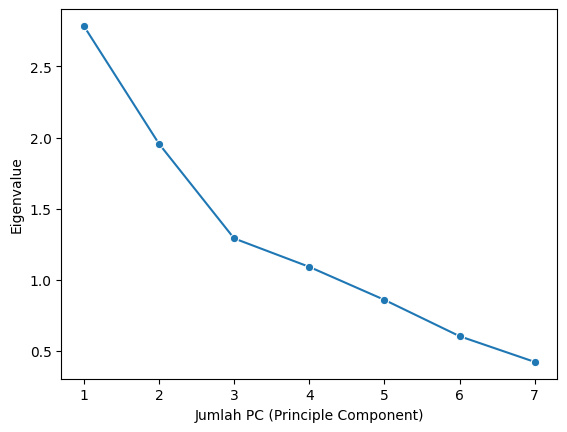

In [ ]:
ax = sns.lineplot(
  x=range(1, len(pca.explained_variance_)+1),
  y=pca.explained_variance_,
  marker='o',
)
ax.set(
  xlabel='Jumlah PC (Principle Component)',
  ylabel='Eigenvalue',
)
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.29879295, 0.20980569, 0.1383421 , 0.11686347, 0.09194464,
       0.06450708, 0.04508587])

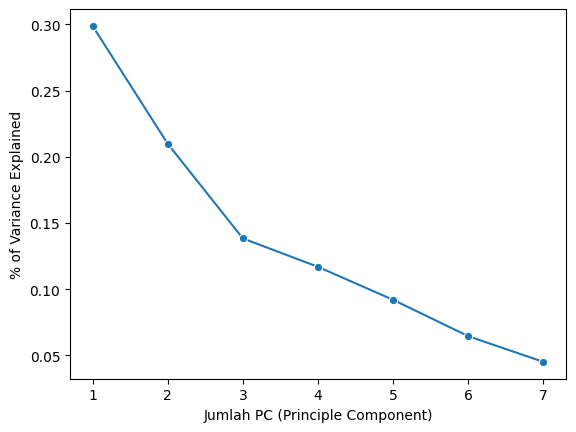

In [ ]:
ax = sns.lineplot(
  x=range(1, len(pca.explained_variance_ratio_)+1),
  y=pca.explained_variance_ratio_,
  marker='o',
)
ax.set(
  xlabel='Jumlah PC (Principle Component)',
  ylabel='% of Variance Explained',
)
plt.show()

In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.29879295, 0.50859864, 0.64694074, 0.76380421, 0.85574885,
       0.92025593, 0.96534181])

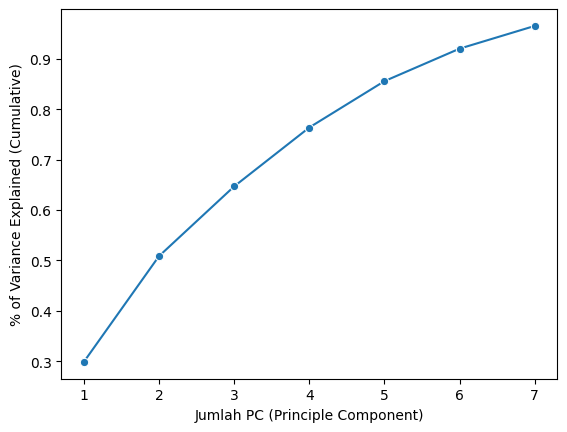

In [ ]:
ax = sns.lineplot(
  x=range(1, len(pca.explained_variance_ratio_)+1),
  y=pca.explained_variance_ratio_.cumsum(),
  marker='o',
)
ax.set(
  xlabel='Jumlah PC (Principle Component)',
  ylabel='% of Variance Explained (Cumulative)',
)
plt.show()

**Dari plot jumlah PC terlihat bahwa jika kita ingin minimum di 70%, maka kita minimum mengambil 4 komponen.**

In [ ]:
# For the visualization, we only need the first two PC's.
n_components = 2
df_km_pca[0][:n_components]

array([14.46676682, 22.31515702])

In [ ]:
# Ubah hasil PCA ke dataframe
pca_df = pd.DataFrame(df_km_pca[:, :2], columns=['PC1','PC2'])

pca_df['cluster_k4'] = df_km['cluster_k4']

pca_df['cluster_k5'] = df_km['cluster_k5']

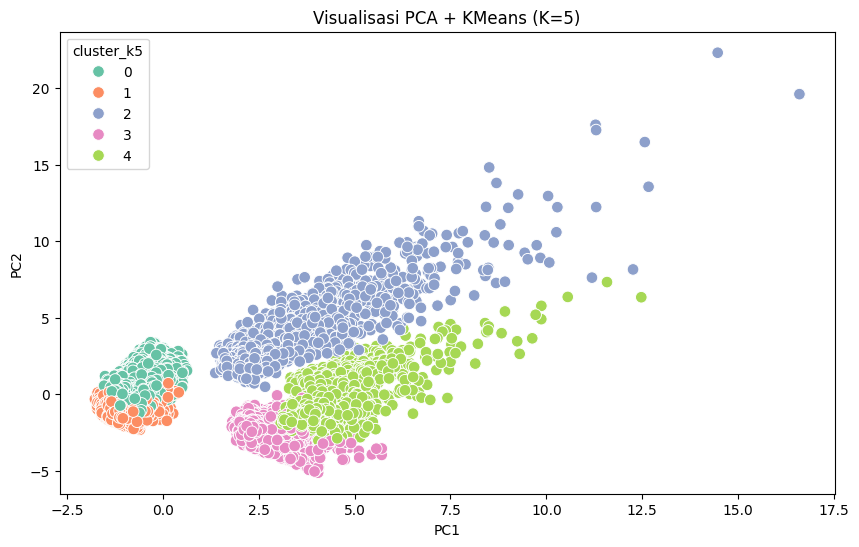

In [ ]:
# K=5
plt.figure(figsize=(10,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster_k5', palette="Set2", s=70)
plt.title("Visualisasi PCA + KMeans (K=5)")
plt.show()


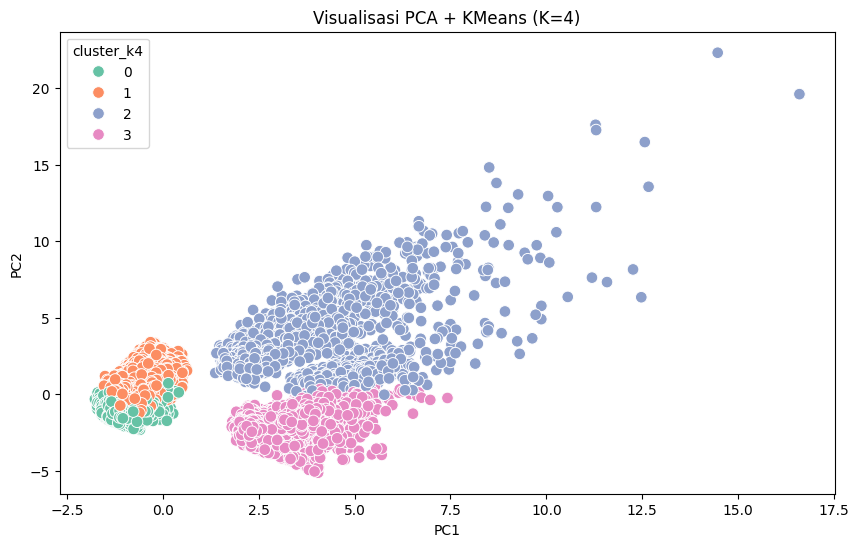

In [ ]:
# K=4
plt.figure(figsize=(10,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster_k4', palette="Set2", s=70)
plt.title("Visualisasi PCA + KMeans (K=4)")
plt.show()

**Overview:**
* Dari 2 plot di atas terlihat bagaimana k=5 dapat membagi segmentasi lebih baik dengan adanya tambahan zona berwarna hijau muda.


# **SImpulan K-Means**

1. Kluster 0 & 1 (Berwarna Hijau & Oranye): Kedua kluster ini terletak di area yang sama pada plot, menunjukkan bahwa mereka adalah kelompok yang paling mirip. Mereka berada di sisi kiri plot, mengindikasikan aktivitas penerbangan yang sangat rendah. Kluster 0 dan 1 ini bisa jadi merepresentasikan pelanggan baru dan pelanggan yang tidak aktif.

2. Kluster 2 (Berwarna Ungu): Kluster ini memiliki PC1 yang tinggi, menunjukkan aktivitas penerbangan yang signifikan. Namun, memiliki PC2 yang rendah. Kelompok ini adalah pelanggan yang aktif dan rutin tetapi mungkin memiliki profil demografis atau perilaku lain yang membedakan mereka dari kelompok super-aktif.

3. Kluster 3 (Berwarna Biru): Kluster ini adalah kelompok yang paling tersebar di sepanjang sumbu PC1. Mereka memiliki PC1 yang sangat tinggi, yang berarti mereka adalah pelanggan yang paling aktif dan loyal. Mereka bisa jadi pelanggan VIP yang memiliki frekuensi penerbangan dan nilai akumulasi poin/kredit yang tertinggi.

4. Kluster 4 (Berwarna Kuning): Kelompok ini menempati area di tengah-tengah plot. Mereka berada di antara pelanggan yang tidak aktif dan pelanggan super-aktif. Kluster ini bisa jadi adalah pelanggan yang sedang berkembang atau pelanggan dengan frekuensi penerbangan sedang.

Perbandingan K=4 vs K=5

* K=4 memberikan gambaran umum yang jelas: Tidak Aktif, Aktif, dan Sangat Aktif.

* K=5 memecah segmen "Tidak Aktif" menjadi dua sub-kelompok yang lebih spesifik. Ini bisa sangat berguna jika Anda ingin membuat strategi re-engagement yang lebih bertarget untuk pelanggan yang baru mendaftar vs. pelanggan lama yang sudah tidak aktif.

**Rekomendasi Bisnis**

Berdasarkan profil yang diidentifikasi dari visualisasi PCA:

* Untuk Kluster 0 & 1 (Tidak Aktif/Baru): Fokus pada strategi aktivasi dan retensi. Mengirimkan penawaran khusus untuk penerbangan pertama, bonus poin untuk interaksi awal, atau panduan untuk memanfaatkan program loyalitas.

* Untuk Kluster 2 (Pelanggan Aktif): Fokus pada peningkatan engagement. Menawarkan tier-up keanggotaan, penawaran eksklusif yang tidak didiskon, atau akses ke fitur premium untuk mendorong mereka menghabiskan lebih banyak.

* Untuk Kluster 3 (VIP/Sangat Loyal): Perlu mempertahankan loyalitas dan mendapatkan word-of-mouth dnegan memberikan layanan personalisasi, pengakuan publik (seperti acara khusus atau newsletter), dan akses ke lounge eksklusif atau first class.

* Untuk Kluster 4 (Potensial) : Perlu melakukan peningkatan frekuensi dengan memberikan penawaran yang mendorong mereka terbang lebih sering. Contohnya, "Terbang 2 kali lagi dan dapatkan poin ekstra untuk naik keanggotaan."

# **RFM**

## **Create RFM**

In [ ]:
# Karena LOAD_TIME semuanya sama = '2014-03-31'
anchor_date = pd.to_datetime("2014-03-31")

# Ubah type last flight date
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'], errors='coerce')

recency = df.groupby('MEMBER_NO').agg({
    'LAST_FLIGHT_DATE': lambda x: (anchor_date - x.max()).days
}).reset_index().rename(columns={'LAST_FLIGHT_DATE':'Recency'})

In [ ]:
# Frequency & Monetary table
freq_mon = df.groupby('MEMBER_NO').agg({
    'FLIGHT_COUNT':'sum',
    'Points_Sum':'sum'
}).reset_index().rename(columns={'FLIGHT_COUNT':'Frequency','Points_Sum':'Monetary'})

In [ ]:
# Merge

rfm = recency.merge(freq_mon, on='MEMBER_NO')

rfm.head()

,MEMBER_NO,Recency,Frequency,Monetary
0,1,196.0,3,7035
1,2,112.0,24,16210
2,3,82.0,9,85008
3,4,29.0,12,10826
4,5,93.0,3,2329


## **Scoring RFM**

In [ ]:
def percent_rank(series):
  return series.rank(pct=True, method='min')

In [ ]:
rfm['RecencyPercentile'] = percent_rank(-rfm['Recency'])
rfm['FrequencyPercentile'] = percent_rank(rfm['Frequency'])
rfm['MonetaryPercentile'] = percent_rank(rfm['Monetary'])

rfm.head()

,MEMBER_NO,Recency,Frequency,Monetary,RecencyPercentile,FrequencyPercentile,MonetaryPercentile
0,1,196.0,3,7035,0.332731,0.165031,0.534816
1,2,112.0,24,16210,0.485687,0.870134,0.782800
2,3,82.0,9,85008,0.558537,0.575268,0.987458
3,4,29.0,12,10826,0.742452,0.675240,0.670874
4,5,93.0,3,2329,0.533764,0.165031,0.203055


In [ ]:
def calculate_score(percentile):
  if percentile >= 0.8:
    return 5
  if percentile >= 0.6:
    return 4
  if percentile >= 0.4:
    return 3
  if percentile >= 0.2:
    return 2
  else:
    return 1

rfm['RecencyScore'] = rfm['RecencyPercentile'].apply(calculate_score)
rfm['FrequencyScore'] = rfm['FrequencyPercentile'].apply(calculate_score)
rfm['MonetaryScore'] = rfm['MonetaryPercentile'].apply(calculate_score)

rfm.head()

,MEMBER_NO,Recency,Frequency,Monetary,RecencyPercentile,FrequencyPercentile,MonetaryPercentile,RecencyScore,FrequencyScore,MonetaryScore
0,1,196.0,3,7035,0.332731,0.165031,0.534816,2,1,3
1,2,112.0,24,16210,0.485687,0.870134,0.782800,3,5,4
2,3,82.0,9,85008,0.558537,0.575268,0.987458,3,3,5
3,4,29.0,12,10826,0.742452,0.675240,0.670874,4,4,4
4,5,93.0,3,2329,0.533764,0.165031,0.203055,3,1,2


In [ ]:
def rfm_segmentation(df):
   conditions = [
       (rfm['RecencyScore'] == 5) & (rfm['FrequencyScore'] >= 4),
       (rfm['RecencyScore'] > 3) & (rfm['FrequencyScore'] >= 2) & (df['FrequencyScore'] <= 3),
       (rfm['RecencyScore'] == 3) & (rfm['FrequencyScore'] == 3),
       (rfm['RecencyScore'] == 4) & (rfm['FrequencyScore'] == 1),
       (rfm['RecencyScore'] == 5) & (rfm['FrequencyScore'] == 1),
       (rfm['RecencyScore'] == 3) & (rfm['FrequencyScore'] <= 2),
       (rfm['RecencyScore'] <= 2) & (rfm['FrequencyScore'] >= 3) & (df['FrequencyScore'] <= 4),
       (rfm['RecencyScore'] <= 2) & (rfm['FrequencyScore'] <= 2),
       (rfm['RecencyScore'] <= 2) & (rfm['FrequencyScore'] == 5)
   ]

   choices = [
       'Champions',
       'Loyal Customers',
       'Need Attention',
       'Promising',
       'New Customers',
       'About to Sleep',
       'At Risk',
       'Hibernating',
       'Cannot Lose Them'
   ]

   rfm['Segment'] = np.select(conditions, choices, default='Other')
   return df

data = rfm_segmentation(rfm)
data.head()

,MEMBER_NO,Recency,Frequency,Monetary,RecencyPercentile,FrequencyPercentile,MonetaryPercentile,RecencyScore,FrequencyScore,MonetaryScore,Segment
0,1,196.0,3,7035,0.332731,0.165031,0.534816,2,1,3,Hibernating
1,2,112.0,24,16210,0.485687,0.870134,0.782800,3,5,4,Other
2,3,82.0,9,85008,0.558537,0.575268,0.987458,3,3,5,Need Attention
3,4,29.0,12,10826,0.742452,0.675240,0.670874,4,4,4,Other
4,5,93.0,3,2329,0.533764,0.165031,0.203055,3,1,2,About to Sleep


## **Visualisasi RFM**

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np

In [ ]:
def create_3d_rfm_plot(rfm):
    fig = px.scatter_3d(rfm,
                        x='RecencyScore',
                        y='FrequencyScore',
                        z='MonetaryScore',
                        color='Segment',
                        title='3D RFM Analysis - Interactive Plot',
                        labels={
                            'RecencyScore': 'Recency Score',
                            'FrequencyScore': 'Frequency Score',
                            'MonetaryScore': 'Monetary Score'
                        },
                        hover_data=['Segment'],
                        opacity=0.7,
                        size_max=10)

    fig.update_layout(
        scene=dict(
            xaxis_title='Recency Score',
            yaxis_title='Frequency Score',
            zaxis_title='Monetary Score',
            bgcolor='white',
            xaxis=dict(gridcolor='lightgray'),
            yaxis=dict(gridcolor='lightgray'),
            zaxis=dict(gridcolor='lightgray')
        ),
        width=800,
        height=600,
        title_x=0.5
    )

    fig.show()
    return fig

def create_enhanced_3d_rfm_plot(rfm):
    color_map = {
        'Champions': '#1f77b4',
        'Loyal Customers': '#2ca02c',
        'New Customers': '#ff7f0e',
        'Big Spenders': '#d62728',
        'Promising': '#9467bd',
        'About to Sleep': '#8c564b',
        'At Risk': '#e377c2',
        'Hibernating': '#7f7f7f',
        'Cannot Lose Them': '#bcbd22',
        'Others': '#17becf'
    }

    segment_counts = df['Segment'].value_counts()
    max_count = segment_counts.max()
    min_count = segment_counts.min()

    fig = go.Figure()

    for segment in rfm['Segment'].unique():
        segment_data = rfm[rfm['Segment'] == segment]
        count = segment_counts[segment]

        marker_size = 3 + (count - min_count) / (max_count - min_count) * 12

        opacity = 0.4 + (count - min_count) / (max_count - min_count) * 0.5

        fig.add_trace(go.Scatter3d(
            x=segment_data['RecencyScore'],
            y=segment_data['FrequencyScore'],
            z=segment_data['MonetaryScore'],
            mode='markers',
            marker=dict(
                size=marker_size,
                color=color_map.get(segment, '#17becf'),
                opacity=opacity,
                line=dict(width=0.5, color='white')
            ),
            name=f"{segment} ({count})",
            hovertemplate=
            '<b>%{text}</b><br>' +
            'Count: ' + str(count) + '<br>' +
            'Recency: %{x}<br>' +
            'Frequency: %{y}<br>' +
            'Monetary: %{z}<br>' +
            '<extra></extra>',
            text=[f"{segment} ({count})"] * len(segment_data)
        ))

    fig.update_layout(
        title={
            'text': '3D RFM Customer Segmentation Analysis',
            'x': 0.5,
            'xanchor': 'center',
            'font': {'size': 20}
        },
        scene=dict(
            xaxis_title='Recency Score (1-5)',
            yaxis_title='Frequency Score (1-5)',
            zaxis_title='Monetary Score (1-5)',
            bgcolor='rgba(240,240,240,0.1)',
            xaxis=dict(
                gridcolor='lightgray',
                showbackground=True,
                backgroundcolor='rgba(230,230,230,0.3)'
            ),
            yaxis=dict(
                gridcolor='lightgray',
                showbackground=True,
                backgroundcolor='rgba(230,230,230,0.3)'
            ),
            zaxis=dict(
                gridcolor='lightgray',
                showbackground=True,
                backgroundcolor='rgba(230,230,230,0.3)'
            ),
            camera=dict(
                eye=dict(x=1.5, y=1.5, z=1.5)
            )
        ),
        width=900,
        height=700,
        legend=dict(
            yanchor="top",
            y=0.99,
            xanchor="left",
            x=0.01,
            bgcolor='rgba(255,255,255,0.8)',
            bordercolor='gray',
            borderwidth=1
        )
    )

    fig.show()
    return fig

def create_rfm_dashboard(rfm):
    fig = make_subplots(
        rows=2, cols=2,
        specs=[[{'type': 'scatter3d', 'colspan': 2}, None],
               [{'type': 'scatter'}, {'type': 'scatter'}]],
        subplot_titles=('3D RFM Analysis', 'Recency vs Frequency', 'Recency vs Monetary'),
        vertical_spacing=0.1
    )

    for segment in rfm['Segment'].unique():
        segment_data = rfm[rfm['Segment'] == segment]
        fig.add_trace(
            go.Scatter3d(
                x=segment_data['RecencyScore'],
                y=segment_data['FrequencyScore'],
                z=segment_data['MonetaryScore'],
                mode='markers',
                name=segment,
                marker=dict(size=4, opacity=0.7),
                showlegend=True
            ),
            row=1, col=1
        )

    for segment in rfm['Segment'].unique():
        segment_data = rfm[rfm['Segment'] == segment]

        fig.add_trace(
            go.Scatter(
                x=segment_data['RecencyScore'],
                y=segment_data['FrequencyScore'],
                mode='markers',
                name=segment,
                showlegend=False,
                marker=dict(size=4, opacity=0.7)
            ),
            row=2, col=1
        )

        fig.add_trace(
            go.Scatter(
                x=segment_data['RecencyScore'],
                y=segment_data['MonetaryScore'],
                mode='markers',
                name=segment,
                showlegend=False,
                marker=dict(size=4, opacity=0.7)
            ),
            row=2, col=2
        )

    fig.update_layout(height=800, title_text="RFM Analysis Dashboard")
    fig.show()
    return fig

def create_rfm_bucket_plot(rfm):
    # Create RFM bucket combinations
    rfm['RFM_Bucket'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str) + rfm['MonetaryScore'].astype(str)

    bucket_stats = rfm.groupby('RFM_Bucket').agg({
        'RecencyScore': 'mean',
        'FrequencyScore': 'mean',
        'MonetaryScore': 'mean',
        'Segment': 'first'
    }).reset_index()
    bucket_stats['Count'] = rfm['RFM_Bucket'].value_counts().values

    color_map = {
        'Champions': '#1f77b4', 'Loyal Customers': '#2ca02c', 'New Customers': '#ff7f0e',
        'Big Spenders': '#d62728', 'Promising': '#9467bd', 'About to Sleep': '#8c564b',
        'At Risk': '#e377c2', 'Hibernating': '#7f7f7f', 'Cannot Lose Them': '#bcbd22',
        'Others': '#17becf'
    }

    max_count = bucket_stats['Count'].max()
    min_count = bucket_stats['Count'].min()

    bucket_stats['Size'] = 5 + (bucket_stats['Count'] - min_count) / (max_count - min_count) * 25
    bucket_stats['Opacity'] = 0.5 + (bucket_stats['Count'] - min_count) / (max_count - min_count) * 0.4

    fig = go.Figure()

    for _, row in bucket_stats.iterrows():
        fig.add_trace(go.Scatter3d(
            x=[row['RecencyScore']],
            y=[row['FrequencyScore']],
            z=[row['MonetaryScore']],
            mode='markers',
            marker=dict(
                size=row['Size'],
                color=color_map.get(row['Segment'], '#17becf'),
                opacity=row['Opacity'],
                line=dict(width=2, color='white'),
                symbol='circle'
            ),
            name=f"{row['RFM_Bucket']} ({row['Count']})",
            hovertemplate=
            '<b>RFM Bucket: %{text}</b><br>' +
            f"Count: {row['Count']}<br>" +
            f"Segment: {row['Segment']}<br>" +
            'R: %{x} | F: %{y} | M: %{z}<br>' +
            '<extra></extra>',
            text=[row['RFM_Bucket']],
            showlegend=False
        ))

    segments_in_data = bucket_stats['Segment'].unique()
    for segment in segments_in_data:
        fig.add_trace(go.Scatter3d(
            x=[None], y=[None], z=[None],
            mode='markers',
            marker=dict(
                size=10,
                color=color_map.get(segment, '#17becf'),
                opacity=0.8
            ),
            name=segment,
            showlegend=True,
            hoverinfo='skip'
        ))

    fig.update_layout(
        title={
            'text': 'RFM Buckets - Size & Opacity by Customer Count',
            'x': 0.5, 'xanchor': 'center', 'font': {'size': 20}
        },
        scene=dict(
            xaxis_title='Recency Score (1-5)',
            yaxis_title='Frequency Score (1-5)',
            zaxis_title='Monetary Score (1-5)',
            xaxis=dict(dtick=1, range=[0.5, 5.5]),
            yaxis=dict(dtick=1, range=[0.5, 5.5]),
            zaxis=dict(dtick=1, range=[0.5, 5.5]),
            bgcolor='rgba(240,240,240,0.1)',
            camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))
        ),
        width=900, height=700
    )

    fig.show()
    return fig, bucket_stats

# Basic 3D plot
fig1 = create_3d_rfm_plot(data)

# Enhanced 3D plot with size/opacity based on segment counts
# fig2 = create_enhanced_3d_rfm_plot(data)

# RFM bucket visualization with size based on exact bucket counts
# fig3, bucket_data = create_rfm_bucket_plot(data)

# Complete dashboard with multiple views
# fig4 = create_rfm_dashboard(data)

# To save the plot as HTML (optional)
# fig.write_html("rfm_3d_analysis.html")

**Rekomendasi Bisnis**

Berdasarkan hasil plot dan scoring RFM di setiap segmen, berikut rekomendasi bisnisnya:

1. Kluster 0: Pelanggan Tidur (Dormant Customers)
* Profil: Kluster ini memiliki nilai rata-rata yang di bawah standar hampir di semua metrik. Bisa dibilang pelanggan yang tidak aktif.
* Rekomendasi Bisnis: Meluncurkan kampanye re-engagement dengan penawaran eksklusif, seperti diskon besar untuk penerbangan berikutnya. Tawarkan poin bonus yang mudah diperoleh untuk mendorong interaksi awal.

2. Kluster 1: Pelanggan Setia (Loyal Customers)
* Profil: Pelanggan ini memiliki usia dan frekuensi penerbangan di atas rata-rata dan terbang secara teratur.
* Rekomendasi Bisnis: Meningkatkan program loyalitas mereka ke tingkatan yang lebih tinggi (tier up) dengan fasilitas eksklusif. Memberikan layanan personalisasi, seperti prioritas check-in atau akses lounge. Kirimkan penawaran spesial yang tidak tersedia untuk publik, sebagai bentuk apresiasi.

3. Kluster 2: Pemburu Diskon (Discount Seekers)
* Profil: Kluster ini memiliki frekuensi penerbangan dan jumlah penukaran poin yang sangat tinggi (FLIGHT_COUNT dan EXCHANGE_COUNT), tetapi juga memiliki diskon rata-rata yang tinggi (avg_discount). Ini menunjukkan bahwa mereka adalah pelanggan yang aktif namun sangat sensitif terhadap harga.
* Rekomendasi Bisnis: Menawarkan promosi yang berfokus pada nilai, bukan hanya diskon, seperti poin ekstra atau upgrade gratis.Dorong mereka untuk membeli layanan tambahan yang tidak didiskon, dan mengunakan komunikasi yang menyoroti manfaat jangka panjang dari program loyalitas.

4. Kluster 3: Pelancong Sekali-kali (Occasional Travelers)
* Profil: Ciri paling menonjol dari kluster ini adalah AVG_INTERVAL mereka yang sangat tinggi, yang berarti mereka memiliki jeda waktu yang lama antar penerbangan atau pelanggan yang tidak sering bepergian.
* Rekomendasi Bisnis: Mengirimkan promosi yang bertepatan dengan musim liburan atau acara khusus. Menawarkan diskon bersyarat, misalnya "Terbang lagi dalam 3 bulan dan dapatkan poin bonus".Menampilkan destinasi baru yang menarik.

5. Kluster 4: Pengumpul Poin (Points Earners)
* Profil: Kluster ini memiliki Point_NotFlight yang jauh di atas rata-rata, menunjukkan bahwa mereka adalah pelanggan yang aktif mengumpulkan poin dari sumber non-penerbangan, seperti kartu kredit atau mitra.
* Rekomendasi Bisnis: Mmeberikan lebih banyak promosi dengan cara untuk menukar poin, seperti penukaran dengan mitra ritel atau hotel dan menawarkan poin bonus saat mereka melakukan penerbangan pertama mereka dengan maskapai Anda.

6. Kluster 5: Pelanggan Potensial (Potential Customers)
* Profil: Kluster ini berada di bawah rata-rata di semua metrik, menunjukkan bahwa mereka adalah pelanggan baru atau yang belum sepenuhnya terlibat.
* Rekomendasi Bisnis: Mengirimkan panduan tentang cara memaksimalkan manfaat program loyalitas dan penawaran untuk penerbangan perdana yang menarik.